In [789]:
#import library
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib
from  sklearn.datasets import make_gaussian_quantiles

# Adaline

In [790]:
df = pd.read_csv('wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [792]:
y = np.where(df['Class'] > 1, -1, 1)
X = df.drop(columns=['Class'])

for column in X.columns:
  mean = X[column].mean()
  std = X[column].std()
  X[column]=(X[column]- mean)/std
  print(X[column].mean() , X[column].std())
  
    
X.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print('Train examples:', len(X_train), len(y_train))
# print('Test examples:', len(X_test), len(y_test))
print('Train examples:', len(X), len(y))

-9.181170181169835e-16 1.0
0.0 0.9999999999999999
-8.070947156544677e-16 1.0
-7.983626244495507e-17 1.0
-1.995906561123877e-17 1.0
3.991813122247754e-17 0.9999999999999998
-3.5926318100229784e-16 1.0
3.5926318100229784e-16 1.0
-1.5967252488991015e-16 0.9999999999999998
1.995906561123877e-17 0.9999999999999999
1.9959065611238769e-16 1.0
3.193450497798203e-16 1.0
-7.983626244495507e-17 1.0
Train examples: 178 178


In [793]:
np.unique(y)

array([-1,  1])

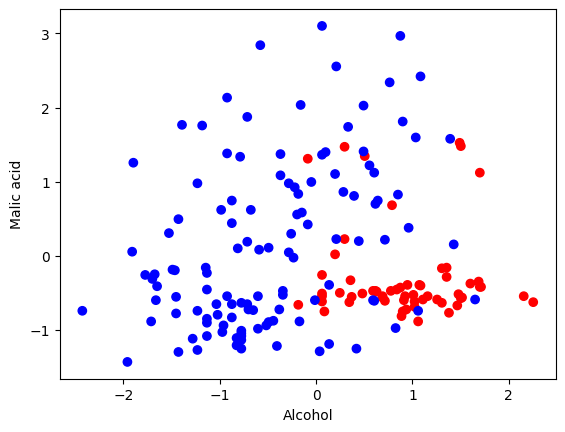

In [794]:
colors = ['red' if label==1  else  'blue' for label in y]
plt.scatter(X['Alcohol'], X['Malic acid'], c=colors)
plt.xlabel('Alcohol');
plt.ylabel('Malic acid');

In [795]:
X.shape

(178, 13)

In [796]:
class  Adaline:

    def __init__(self):

        self.w1 = 0.01*np.random.randn(2 + 1)
        self.cost = []

    def update_weights_for_one_epoch(self, inputs, outputs, learning_rate):
        x, y_true = inputs, outputs
        cost = 0
        n = x.shape[0] 
        for i in range(n):
            net , _= self.predict(x[i])
            
            
            self.w1[1:] = self.w1[1:] + learning_rate*x[i]*(y_true[i]-net)
            self.w1[0] = self.w1[0] + learning_rate*(y_true[i]-net)
            cost += 0.5 * (y_true[i]-net)**2 
        return cost / n

    def fit(self, inputs, outputs, learning_rate = 0.01, epochs = 64):
        for _ in range(epochs):
            self.cost.append(self.update_weights_for_one_epoch(np.array(inputs), np.array(outputs), learning_rate))

    def predict(self, inputs):
        x = np.array(inputs)
        net = x@self.w1[1:] +  self.w1[0]
        h = np.where(net >= 0, 1, -1)

        return net, h


In [797]:
def evaluation(model, inputs, outputs):
  _, prediction = model.predict(inputs)
  return np.mean(prediction == outputs) * 100

In [798]:
model = Adaline()

model.fit(X[['Alcohol','Malic acid']], y, learning_rate = 0.001, epochs = 100) 



In [799]:
# Model evaluation 
print(f"model accuracy on given set: {round(evaluation(model, X[['Alcohol','Malic acid']], y), 2)}%") 

model accuracy on given set: 85.39%


In [800]:

print(model.cost[18])

0.2266704975798638


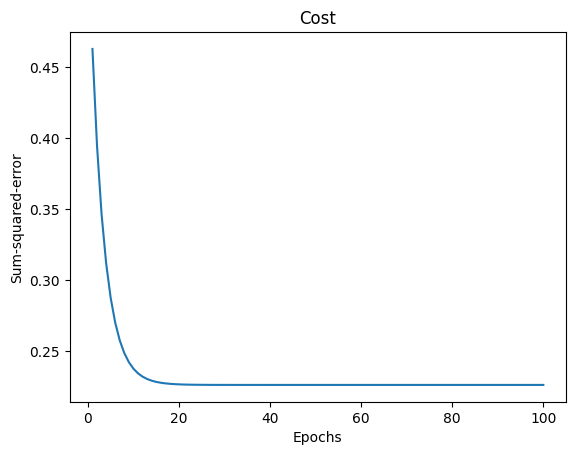

In [801]:
cost = model.cost
epochs = range(1, len(cost) + 1)


plt.plot(epochs, cost)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title(f'Cost')
plt.show()


In [802]:
df = pd.read_csv('wine.data.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [803]:
y = np.where(df['Class'] == 2, 1, -1)
X = df.drop(columns=['Class'])

for column in X.columns:
  mean = X[column].mean()
  std = X[column].std()
  X[column]=(X[column]- mean)/std
  
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


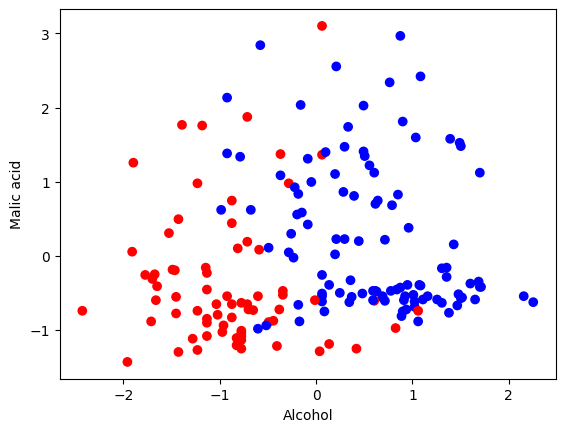

In [804]:
colors = ['red' if label==1  else  'blue' for label in y]
plt.scatter(X['Alcohol'], X['Malic acid'], c=colors)
plt.xlabel('Alcohol');
plt.ylabel('Malic acid');

In [805]:
model = Adaline()

model.fit(X[['Alcohol','Malic acid']], y, learning_rate = 0.001, epochs = 100) 


In [806]:
print(f"model accuracy on given set: {round(evaluation(model, X[['Alcohol','Malic acid']], y), 2)}%") 

model accuracy on given set: 88.76%


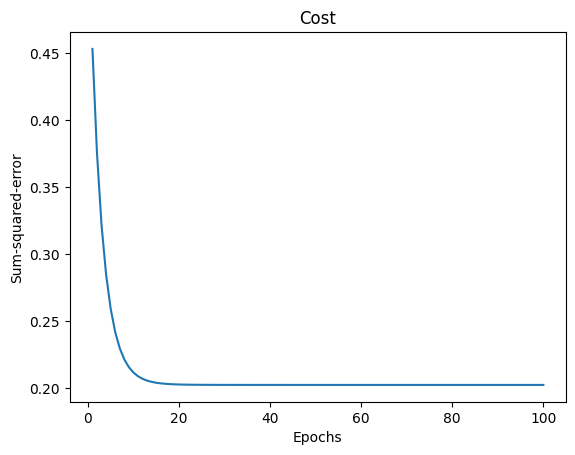

In [807]:
cost = model.cost
epochs = range(1, len(cost) + 1)


plt.plot(epochs, cost)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title(f'Cost')
plt.show()

# Madaline

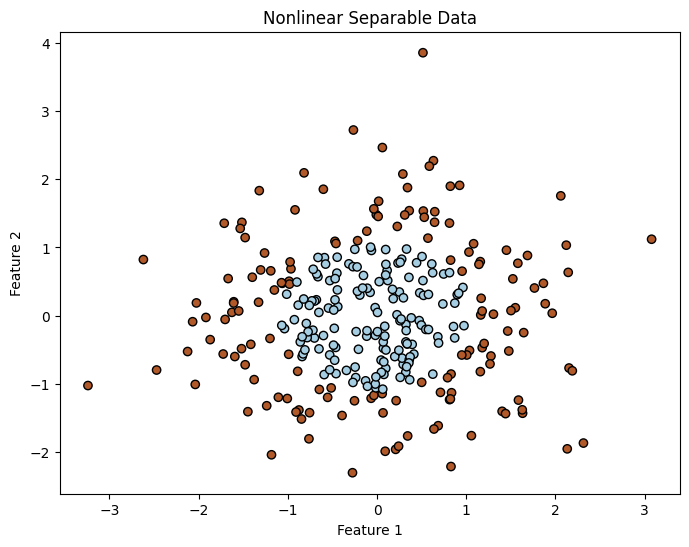

In [808]:
np.random.seed(42)

X, y = make_gaussian_quantiles(n_samples=300, n_features=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Nonlinear Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [809]:
X.shape

(300, 2)

In [810]:
print(np.unique(y_train))

[0 1]


In [811]:
y_train = [1 if i == 1 else -1 for i in y_train]
y_test = [1 if i == 1 else -1 for i in y_test]

In [812]:
# np.random.seed(123)
class  Madaline:

    def __init__(self, num_n):

        self.w =  np.random.randn(num_n, 3) 
        self.v = 1*np.ones(num_n + 1)
        self.v[0] = num_n - 1 
        self.count = 0 


    def update_weights_for_one_epoch(self, inputs, outputs, learning_rate):
        x, y_true = inputs, outputs
        old_w = self.w.copy()
        for i in range(x.shape[0]):
            z_in = self.w[: , 1:] @ x[i].T  + np.sum(self.w[: , 0]) #(num_n, 300)
            z = np.where(z_in >= 0, 1, -1)#(300, num_n)

            y_in = self.v[ 1:] @ z  + np.sum(self.v[0]) 
            y = np.where(y_in >= 0, 1, -1)
            if y != y_true[i]:
                if y_true[i] == 1:
                    self.w[np.where(z_in == max(z_in )),1:] += learning_rate * (1 - z_in[np.where(z_in == max(z_in ))]) * x[i] 
                    self.w[np.where(z_in == max(z_in)),0] += learning_rate * (1 - z_in[np.where(z_in == max(z_in))])

                else:
                    ind = [j  for j, x in enumerate(z_in) if x > 0]
                    for j in ind:
                            self.w[j, 1:] +=  learning_rate * (
                                    -1 - (z_in[j])) * x[i]
                            self.w[j , 0] +=  learning_rate * (-1 - z_in[j])
        if(np.all((np.abs(self.w - old_w)) < 1e-5)):
            self.count += 1 
        else:
            self.count = 0 




    

    def fit(self, inputs, outputs, learning_rate = 0.01, epochs = 600):
        for _ in range(epochs):
            self.update_weights_for_one_epoch(inputs, outputs, learning_rate)
            if(self.count ==10):
                break




    def predict(self, inputs):
        x = inputs

        z_in = self.w[: , 1:] @ x.T  + np.sum(self.w[: , 0]) #(num_n, 300)
        z = np.where(z_in >= 0, 1, -1)#(300, num_n)

        y_in = self.v[1:] @ z  + np.sum(self.v[ 0]) 
        y = np.where(y_in >= 0, 1, -1)

        return z_in, y

        

In [816]:
neuron_counts = [3,5,8]
for num_n in neuron_counts:
    model =Madaline(num_n)
    model.fit(X_train, y_train, learning_rate = 0.001, epochs = 1000) 

    print(f"The model accuracy with {num_n} neurons: {round(evaluation(model, X_test, y_test), 2)}%") # TODO



The model accuracy with 3 neurons: 86.67%
The model accuracy with 5 neurons: 90.0%
The model accuracy with 8 neurons: 95.0%
